# Importing necessary files

In [ ]:
import os 
os.chdir("/content/drive/My Drive/Colab Notebooks")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Count Plot

In [ ]:
# Read the csv file into pandas dataframe
data = pd.read_csv("master996.csv", encoding="ISO-8859-1", delimiter=";")

data['book_id'] = data['book_id'].str.replace('.epub', '-content.html', case=False)
book_id_array = data['book_id'].to_numpy()
genre = ['guten_genre']


In [ ]:
data['guten_genre'].value_counts()

Literary                       794
Detective and Mystery          111
Sea and Adventure               36
Western Stories                 18
Love and Romance                18
Ghost and Horror                 6
Humorous and Wit and Satire      6
Christmas Stories                5
Allegories                       2
Name: guten_genre, dtype: int64

Text(0.5, 1.0, 'Frequency of Each Class Label in Corpus')

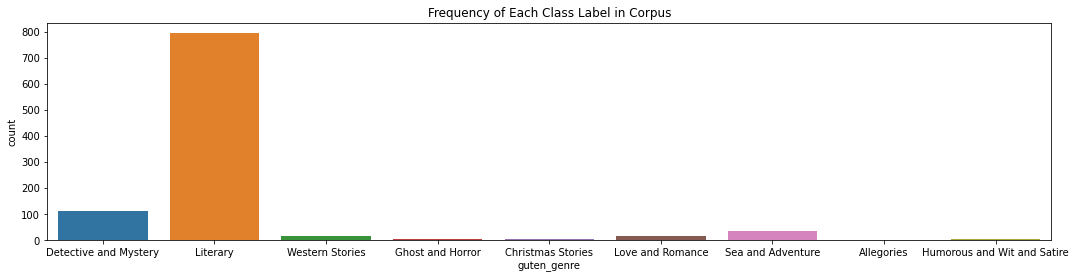

In [ ]:
plt.figure(figsize=(18,4))
sns.countplot(data['guten_genre'])
plt.title("Frequency of Each Class Label in Corpus")

# Pie Chart 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


Text(0.5, 1.0, 'Pie chart showing percentage of labels')

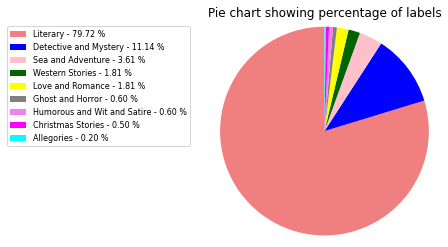

In [ ]:
# Reference: https://stackoverflow.com/questions/23577505/how-to-avoid-overlapping-of-labels-autopct-in-a-matplotlib-pie-chart
x = np.char.array(['Literary',                       
'Detective and Mystery',          
'Sea and Adventure',               
'Western Stories',                
'Love and Romance',                
'Ghost and Horror',               
'Humorous and Wit and Satire',      
'Christmas Stories',                
'Allegories'])
y = np.array([794,111,36,18,18,6,6,5,2])
explode = (0.1, 0,0,0,0,0,0,0,0)  

plt.figure(figsize=(20,4))
colors = ['lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
percent = 100.*y/y.sum()

patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='top right', bbox_to_anchor=(-0.1, 1.),
           fontsize=8)

plt.title("Pie chart showing percentage of labels")

# PCA Analysis and Scatter Plot on Extracted Features

In [ ]:
df1 = pd.read_csv("final_features_without_null_values.csv",encoding="ISO-8859-1")
df1['class'].value_counts()

5    792
2    111
7     36
8     18
6     18
4      6
3      6
1      5
0      2
Name: class, dtype: int64

In [ ]:
originalDf = pd.read_csv("master996.csv",encoding="ISO-8859-1",delimiter=';')
originalDf.drop(originalDf[originalDf['book_id'] == 'pg38685.epub'].index, inplace=True)
originalDf.drop(originalDf[originalDf['book_id'] == 'pg34164.epub'].index, inplace=True)
originalDf['guten_genre'].value_counts()

Literary                       792
Detective and Mystery          111
Sea and Adventure               36
Western Stories                 18
Love and Romance                18
Ghost and Horror                 6
Humorous and Wit and Satire      6
Christmas Stories                5
Allegories                       2
Name: guten_genre, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
df2 = df1.drop('class',axis=1)
y_true = df1['class'].values
df2 = StandardScaler().fit_transform(df2)

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df2)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf['class'] = originalDf['guten_genre']

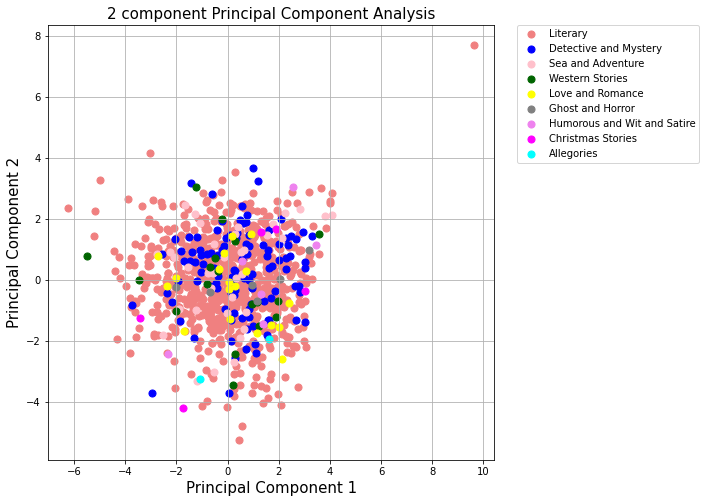

In [ ]:
# Reference : https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)

ax.set_title('2 component Principal Component Analysis', fontsize = 15)
targets = ['Literary', 'Detective and Mystery','Sea and Adventure','Western Stories','Love and Romance','Ghost and Horror','Humorous and Wit and Satire','Christmas Stories','Allegories']
colors = ['lightcoral','blue','pink', 'darkgreen','yellow','grey','violet','magenta','cyan']
for target, color in zip(targets,colors):
    indices = principalDf['class'] == target
    ax.scatter(principalDf.loc[indices, 'principal component 1'], principalDf.loc[indices, 'principal component 2'], c = color, s = 50)
plt.legend(targets,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.grid()

# Pair Plot for Features He and She Pronouns

<Figure size 864x576 with 0 Axes>

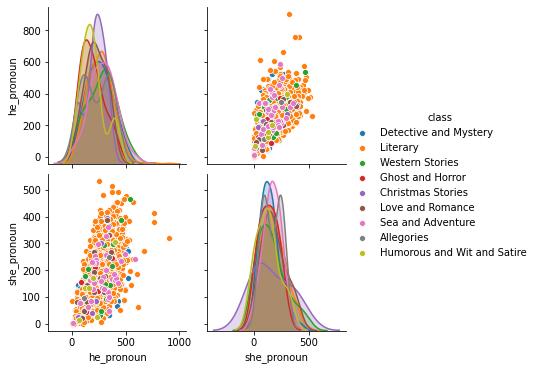

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(data=df3,vars=['he_pronoun','she_pronoun'],hue='class')